In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
#Read Data
reviews = pd.read_csv('Reviews.csv')
reviews  = reviews.head(1000)
print(reviews .shape)

(1000, 10)


In [3]:
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
one_example = reviews['Text'][10]
print(one_example)

I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service!


In [9]:
word_tok = nltk.word_tokenize(one_example)
word_tok

['I',
 'do',
 "n't",
 'know',
 'if',
 'it',
 "'s",
 'the',
 'cactus',
 'or',
 'the',
 'tequila',
 'or',
 'just',
 'the',
 'unique',
 'combination',
 'of',
 'ingredients',
 ',',
 'but',
 'the',
 'flavour',
 'of',
 'this',
 'hot',
 'sauce',
 'makes',
 'it',
 'one',
 'of',
 'a',
 'kind',
 '!',
 'We',
 'picked',
 'up',
 'a',
 'bottle',
 'once',
 'on',
 'a',
 'trip',
 'we',
 'were',
 'on',
 'and',
 'brought',
 'it',
 'back',
 'home',
 'with',
 'us',
 'and',
 'were',
 'totally',
 'blown',
 'away',
 '!',
 'When',
 'we',
 'realized',
 'that',
 'we',
 'simply',
 'could',
 "n't",
 'find',
 'it',
 'anywhere',
 'in',
 'our',
 'city',
 'we',
 'were',
 'bummed.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'Now',
 ',',
 'because',
 'of',
 'the',
 'magic',
 'of',
 'the',
 'internet',
 ',',
 'we',
 'have',
 'a',
 'case',
 'of',
 'the',
 'sauce',
 'and',
 'are',
 'ecstatic',
 'because',
 'of',
 'it.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'If',
 'you',
 'love',
 'hot',
 'sauce',
 '.

In [10]:
tag = nltk.pos_tag(word_tok)
tag

[('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('know', 'VB'),
 ('if', 'IN'),
 ('it', 'PRP'),
 ("'s", 'VBZ'),
 ('the', 'DT'),
 ('cactus', 'NN'),
 ('or', 'CC'),
 ('the', 'DT'),
 ('tequila', 'NN'),
 ('or', 'CC'),
 ('just', 'RB'),
 ('the', 'DT'),
 ('unique', 'JJ'),
 ('combination', 'NN'),
 ('of', 'IN'),
 ('ingredients', 'NNS'),
 (',', ','),
 ('but', 'CC'),
 ('the', 'DT'),
 ('flavour', 'NN'),
 ('of', 'IN'),
 ('this', 'DT'),
 ('hot', 'JJ'),
 ('sauce', 'NN'),
 ('makes', 'VBZ'),
 ('it', 'PRP'),
 ('one', 'CD'),
 ('of', 'IN'),
 ('a', 'DT'),
 ('kind', 'NN'),
 ('!', '.'),
 ('We', 'PRP'),
 ('picked', 'VBD'),
 ('up', 'RP'),
 ('a', 'DT'),
 ('bottle', 'NN'),
 ('once', 'RB'),
 ('on', 'IN'),
 ('a', 'DT'),
 ('trip', 'NN'),
 ('we', 'PRP'),
 ('were', 'VBD'),
 ('on', 'IN'),
 ('and', 'CC'),
 ('brought', 'VBD'),
 ('it', 'PRP'),
 ('back', 'RP'),
 ('home', 'NN'),
 ('with', 'IN'),
 ('us', 'PRP'),
 ('and', 'CC'),
 ('were', 'VBD'),
 ('totally', 'RB'),
 ('blown', 'VBN'),
 ('away', 'RB'),
 ('!', '.'),
 ('When', 'W

In [11]:
ent = nltk.chunk.ne_chunk(tag)
ent.pprint()

(S
  I/PRP
  do/VBP
  n't/RB
  know/VB
  if/IN
  it/PRP
  's/VBZ
  the/DT
  cactus/NN
  or/CC
  the/DT
  tequila/NN
  or/CC
  just/RB
  the/DT
  unique/JJ
  combination/NN
  of/IN
  ingredients/NNS
  ,/,
  but/CC
  the/DT
  flavour/NN
  of/IN
  this/DT
  hot/JJ
  sauce/NN
  makes/VBZ
  it/PRP
  one/CD
  of/IN
  a/DT
  kind/NN
  !/.
  We/PRP
  picked/VBD
  up/RP
  a/DT
  bottle/NN
  once/RB
  on/IN
  a/DT
  trip/NN
  we/PRP
  were/VBD
  on/IN
  and/CC
  brought/VBD
  it/PRP
  back/RP
  home/NN
  with/IN
  us/PRP
  and/CC
  were/VBD
  totally/RB
  blown/VBN
  away/RB
  !/.
  When/WRB
  we/PRP
  realized/VBD
  that/IN
  we/PRP
  simply/RB
  could/MD
  n't/RB
  find/VB
  it/PRP
  anywhere/RB
  in/IN
  our/PRP$
  city/NN
  we/PRP
  were/VBD
  bummed./JJ
  </NNP
  br/NN
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >/NNP
  Now/RB
  ,/,
  because/IN
  of/IN
  the/DT
  magic/NN
  of/IN
  the/DT
  internet/NN
  ,/,
  we/PRP
  have/VBP
  a/DT
  case/NN
  of/IN
  the/DT
  sauce/NN
  and/CC
  are/VBP


VADER SENTIMENT SCORE

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [13]:
sia.polarity_scores(one_example)

{'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746}

In [14]:
# Running the score on the entire dataset
corpus = {}
for i, row in tqdm(reviews.iterrows(), total=len(reviews)):
    text = row['Text']
    myid = row['Id']
    corpus[myid] = sia.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [15]:
vader_result = pd.DataFrame(corpus).T
vader_result = vader_result.reset_index().rename(columns={'index': 'Id'})
vader_result = vader_result.merge(reviews, how='left')

In [16]:
vader_result.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


SHOWING VADER RESULTS

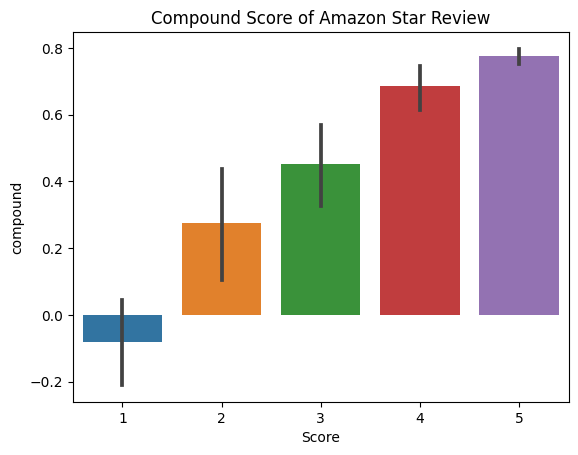

In [17]:
vaderPlot = sns.barplot(data=vader_result, x='Score', y='compound')
vaderPlot.set_title('Compound Score of Amazon Star Review')
plt.show()

Text(0.5, 1.0, 'Negative')

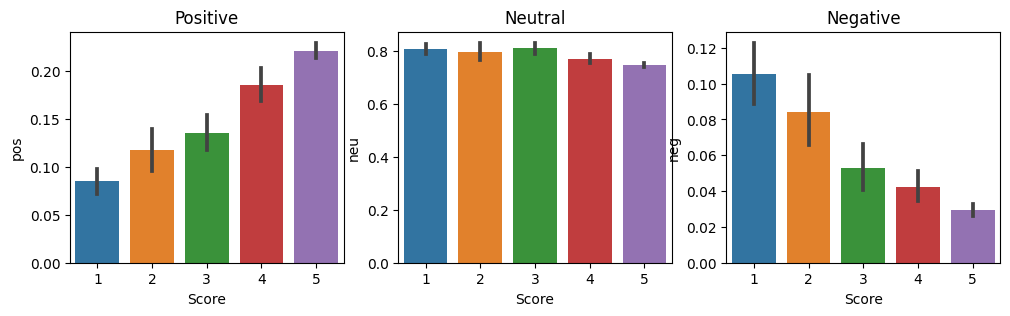

In [19]:
fig, axis = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data = vader_result, x = 'Score', y = 'pos', ax = axis[0])
sns.barplot(data = vader_result, x = 'Score', y = 'neu', ax = axis[1])
sns.barplot(data = vader_result, x = 'Score', y = 'neg', ax = axis[2])
axis[0].set_title('Positive')
axis[1].set_title('Neutral')
axis[2].set_title('Negative')


ROBERTA PRETRAINED MODEL

In [20]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [22]:
sia.polarity_scores(one_example)

{'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746}

In [23]:
# Run for Roberta Model
encoded_text = tokenizer(one_example, return_tensors = 'pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'rob_negative' : scores[0],
    'rob_neutral' : scores[1],
    'rob_positive' : scores[2]
}
print(scores_dict)

{'rob_negative': 0.019134082, 'rob_neutral': 0.07104438, 'rob_positive': 0.9098215}


In [24]:
def roberta_scores(one_example):
    encoded_text = tokenizer(one_example, return_tensors = 'pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'rob_negative' : scores[0],
        'rob_neutral' : scores[1],
        'rob_positive' : scores[2]
    }
    return scores_dict

In [25]:
res = {}
for i, row in tqdm(reviews.iterrows(), total=len(reviews)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}

        
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = roberta_scores(text)
        both_results = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/1000 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187
Broke for id 529
Broke for id 540
Broke for id 746
Broke for id 863


In [26]:
both_results = pd.DataFrame(res).T
both_results = both_results.reset_index().rename(columns={'index': 'Id'})
both_results = both_results.merge(reviews, how='right')

COMPARE MODEL SCORES

In [29]:
both_results.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'rob_negative', 'rob_neutral', 'rob_positive', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

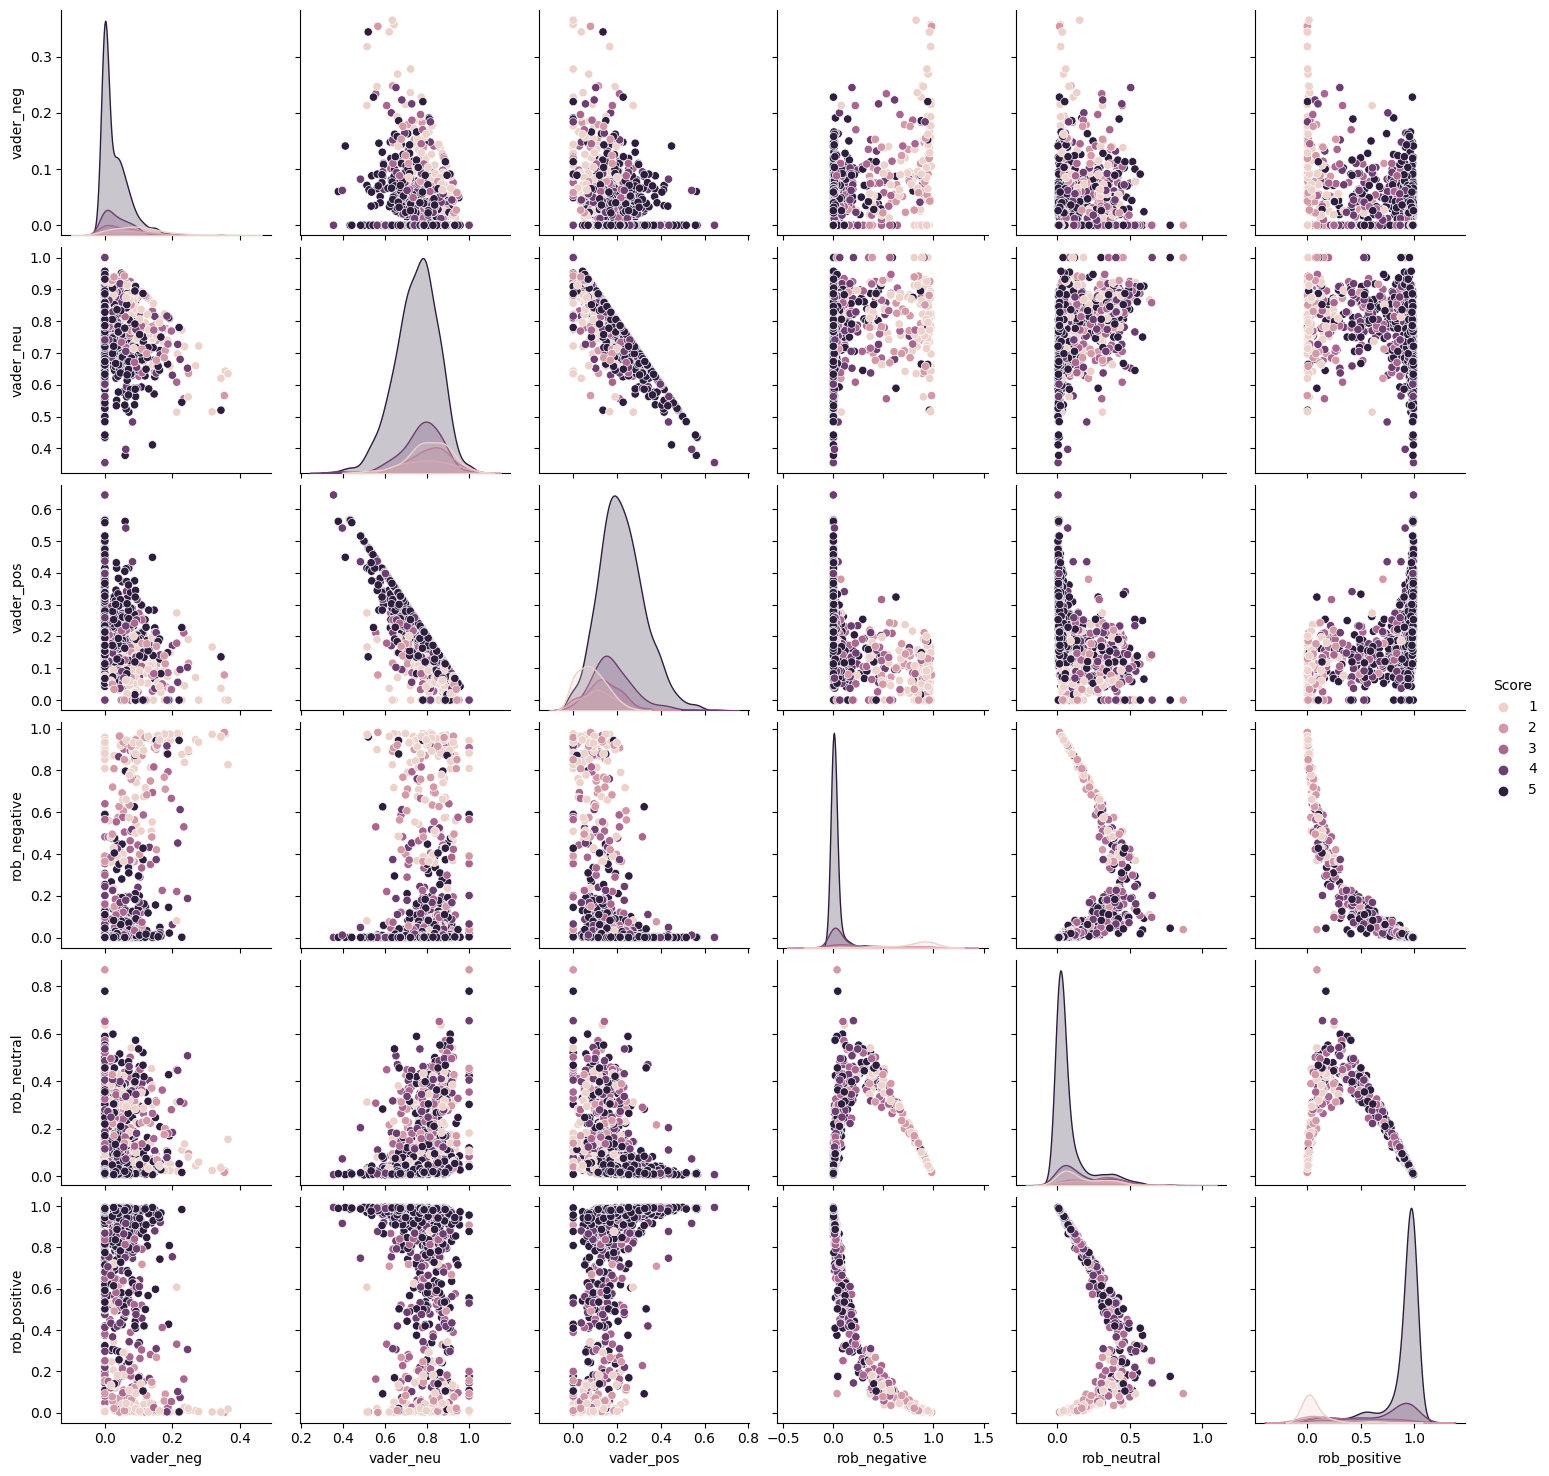

In [30]:
sns.pairplot(data = both_results,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
       'rob_negative', 'rob_neutral', 'rob_positive'], hue='Score')
plt.show()

Pairplot clearly shows thinner distribution for Roberta model indicating better predictions

EXAMPLE REVIEWS

In [31]:
both_results.query('Score == 1').sort_values('rob_positive', ascending=False)['Text'].values[0]

"I just wanted to post here that I found small bits of plastic in this food as I was feeding my 9 month old.  Plastic!!! in food!!!! baby food!!!  So please be careful if you buy this or are considering it.<br /><br />My daughter LOVES this food-- it's actually her favorite.  This is the first time we have noticed plastic in it in over 2 months."

In [38]:
both_results.query('Score == 1').sort_values('vader_pos', ascending=False)['Text'].values[0]

#Very bad Prediction

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [37]:
both_results.query('Score == 4').sort_values('rob_negative', ascending=False)['Text'].values[0]

"I think Plocky's brand as a whole is a cut above in quality but I found these to lack in taste somewhat and be a little greasy."

In [36]:
both_results.query('Score == 4').sort_values('vader_neg', ascending=False)['Text'].values[0]

'Eat at your own risk.  Once I would open a bag I could not stop.  Good and salty.'